In [378]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [379]:
#https://rosstat.gov.ru/folder/12781
populRF = pd.read_excel('росстатPopul2022.xls', index_col=0, header=5)

In [380]:
populRF.drop(labels=['Все население.1',
                     'Городское население.1',
                     'Сельское население.1'],
             axis='columns',
             inplace = True)

region_list = list(populRF.index)
list1 = [r'.*федер.*|.*Федеp.*|.*Ненецк.*'] * len(region_list)
arr = np.array(list(map(re.match, list1, region_list)), dtype=bool)
populRF_regs = populRF.drop(labels=['Ханты-Мансийский автономный округ-Югра',
                                    'Тюменская область без автономных округов'])
populRF_regs.drop(labels=populRF[arr].index, inplace = True)

In [381]:
populRF_regs.sort_values('Все население', ascending=False, inplace=True)

In [382]:
list(populRF_regs.index) # 29-й субъект по населению
populRF_regs['Все население']['Белгородская область']/populRF['Все население']['Российская Федеpация']
#процент по рф

0.010518573115511678

In [384]:
#https://showdata.gks.ru/report/278006/
#https://showdata.gks.ru/report/278008/

mig_in_inner = pd.read_excel('мигранты_прибывшие_в_пределахРФ2020.xlsx', index_col=0, header=0)
mig_in_inner.drop(labels=['Unnamed: 1',
                          'Unnamed: 3'],
                  axis='columns',
                  inplace = True)
mig_in_inner.drop(labels=['Оба пола',
                          'Всего по территории',
                          'В пределах России',
                          'Всего'],
                  axis='rows',
                  inplace = True)

mig_in_inner.rename(columns={mig_in_inner.columns[0]: 'Число прибывших в пределах России'},
                   inplace=True)

###########
mig_out_inner = pd.read_excel('мигранты_выбывшие_в_пределахРФ2020.xlsx', index_col=0, header=0)
mig_out_inner.drop(labels=['Оба пола',
                           'Всего по территории',
                           'В пределах России',
                           'Всего'],
                   axis='rows',
                   inplace = True)
mig_in_inner['Число выбывших в пределах России'] = mig_out_inner.iloc[:, [1]]

###########
mig_in_internat = pd.read_excel('мигранты_прибывшие_междунар2020.xlsx', index_col=0, header=0)

mig_in_internat.drop(labels=['Оба пола',
                             'Всего по территории',
                             'Международная',
                             'Всего'],
                     axis='rows',
                     inplace = True)
mig_in_inner['Число прибывших из-за рубежа'] = mig_in_internat.iloc[:, [1]]

###########
mig_out_internat = pd.read_excel('мигранты_выбывшие_междунар2020.xlsx', index_col=0, header=0)

mig_out_internat.drop(labels=['Оба пола',
                              'Всего по территории',
                              'Международная',
                              'Всего'],
                      axis='rows',
                      inplace = True)
mig_in_inner['Число выбывших за рубеж'] = mig_out_internat.iloc[:, [1]]



midDB = mig_in_inner
midDB

,Число прибывших в пределах России,Число выбывших в пределах России,Число прибывших из-за рубежа,Число выбывших за рубеж
https://showdata.gks.ru/report/278008/,,,,
Российская Федерация,3526597.0,3526597.0,594146.0,487672.0
Центральный федеральный округ,914242.0,883469.0,186804.0,159179.0
Белгородская область,35763.0,35212.0,14572.0,10894.0
Брянская область,29256.0,29418.0,3561.0,2126.0
Владимирская область,24341.0,27211.0,4768.0,3492.0
...,...,...,...,...
Амурская область,23064.0,24617.0,1892.0,3483.0
Магаданская область,5552.0,6496.0,1356.0,1031.0
Сахалинская область,14931.0,15661.0,5022.0,5739.0


In [385]:
midDB['Сальдо внутренней миграции'] = midDB['Число прибывших в пределах России'] - midDB['Число выбывших в пределах России']
midDB['Сальдо внешней миграции'] = midDB['Число прибывших из-за рубежа'] - midDB['Число выбывших за рубеж']
midDB['Чистая миграция'] = midDB['Сальдо внутренней миграции'] + midDB['Сальдо внешней миграции']
midDB.rename(index={'Город Москва столица Российской Федерации город федерального значения': 'Москва'},
                   inplace=True,
            )
midDB

,Число прибывших в пределах России,Число выбывших в пределах России,Число прибывших из-за рубежа,Число выбывших за рубеж,Сальдо внутренней миграции,Сальдо внешней миграции,Чистая миграция
https://showdata.gks.ru/report/278008/,,,,,,,
Российская Федерация,3526597.0,3526597.0,594146.0,487672.0,0.0,106474.0,106474.0
Центральный федеральный округ,914242.0,883469.0,186804.0,159179.0,30773.0,27625.0,58398.0
Белгородская область,35763.0,35212.0,14572.0,10894.0,551.0,3678.0,4229.0
Брянская область,29256.0,29418.0,3561.0,2126.0,-162.0,1435.0,1273.0
Владимирская область,24341.0,27211.0,4768.0,3492.0,-2870.0,1276.0,-1594.0
...,...,...,...,...,...,...,...
Амурская область,23064.0,24617.0,1892.0,3483.0,-1553.0,-1591.0,-3144.0
Магаданская область,5552.0,6496.0,1356.0,1031.0,-944.0,325.0,-619.0
Сахалинская область,14931.0,15661.0,5022.0,5739.0,-730.0,-717.0,-1447.0


In [386]:
# for i in range(len(midDB.index)):
#     if midDB.index[i] != populRF.index[i]:
#         print(midDB.index[i])
#         print(populRF.index[i])
        

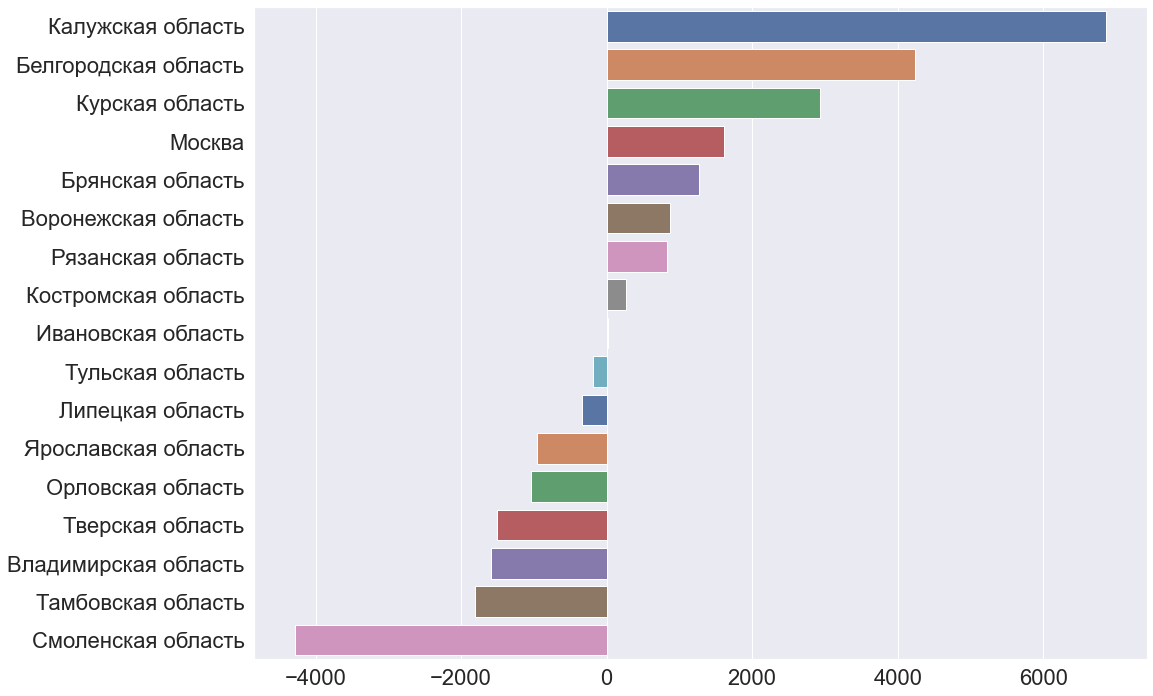

In [387]:
midDB_CFO = midDB[2:20].drop(labels='Московская область', axis='rows')
midDB_CFO.sort_values('Чистая миграция', ascending=False, inplace=True)

data = list(midDB_CFO['Чистая миграция'])
labels = list(midDB_CFO['Чистая миграция'].index)

colors = sns.color_palette('pastel')[2:20]

sns.set(font_scale = 2)
plt.figure(figsize=(16, 12))
sns.barplot(x=data, y=labels, palette="deep")
plt.savefig('CFO_full_migr.png', bbox_inches='tight')
plt.show()

In [388]:
print(midDB['Чистая миграция']['Центральный федеральный округ'])
print(midDB['Чистая миграция']['Белгородская область'])

58398.0
4229.0


In [389]:
4229/58398

0.07241686359121888

In [390]:
print(midDB['Чистая миграция']['Белгородская область'])
print(midDB['Чистая миграция']['Российская Федерация'])

4229.0
106474.0


In [391]:
4229/106474

0.03971861675150741

In [392]:
belg_nat_grow = pd.read_excel('Белг_рожд_сметрн.xls', index_col=0, header=4)

In [393]:
belg_nat_grow.iloc[34]

родившихся                12294.0
умерших                   24039.0
естественный прирост     -11745.0
родившихся.1                  8,0
умерших.1                    15,6
естественный прирост.1       -7,6
Name: 2020, dtype: object

In [394]:
full_grow = pd.read_excel('рф_рожд_сметрн.xls', index_col=0, header=0)

full_grow_CFO = full_grow[3:21].drop(labels='Московская область', axis='rows')
full_grow_CFO.rename(columns={full_grow_CFO.columns[1]: 'Общий прирост'},
                   inplace=True)
full_grow_CFO.rename(index={'Город Москва столица Российской Федерации город федерального значения': 'Москва'},
                   inplace=True,
            )

full_grow_CFO

,Unnamed: 1,Общий прирост,Unnamed: 3
Белгородская область,14000000000,-7892.0,NaN
Брянская область,15000000000,-9809.0,NaN
Владимирская область,17000000000,-16317.0,NaN
Воронежская область,20000000000,-18597.0,NaN
Ивановская область,24000000000,-10103.0,NaN
Калужская область,29000000000,-1595.0,NaN
Костромская область,34000000000,-4962.0,NaN
Курская область,38000000000,-7520.0,NaN
Липецкая область,42000000000,-11179.0,NaN
Орловская область,54000000000,-8812.0,NaN


In [395]:
nat_grow_CFO = full_grow_CFO['Общий прирост'] - midDB_CFO['Чистая миграция']
nat_grow_CFO.sort_values(axis=0, ascending=False, inplace=True)
nat_grow_CFO

Костромская область     -5227.0
Орловская область       -7775.0
Калужская область       -8456.0
Смоленская область      -9473.0
Ивановская область     -10123.0
Курская область        -10450.0
Тамбовская область     -10525.0
Липецкая область       -10840.0
Ярославская область    -11001.0
Брянская область       -11082.0
Рязанская область      -11411.0
Белгородская область   -12121.0
Тверская область       -13246.0
Владимирская область   -14723.0
Тульская область       -16826.0
Воронежская область    -19463.0
Москва                 -24638.0
dtype: float64

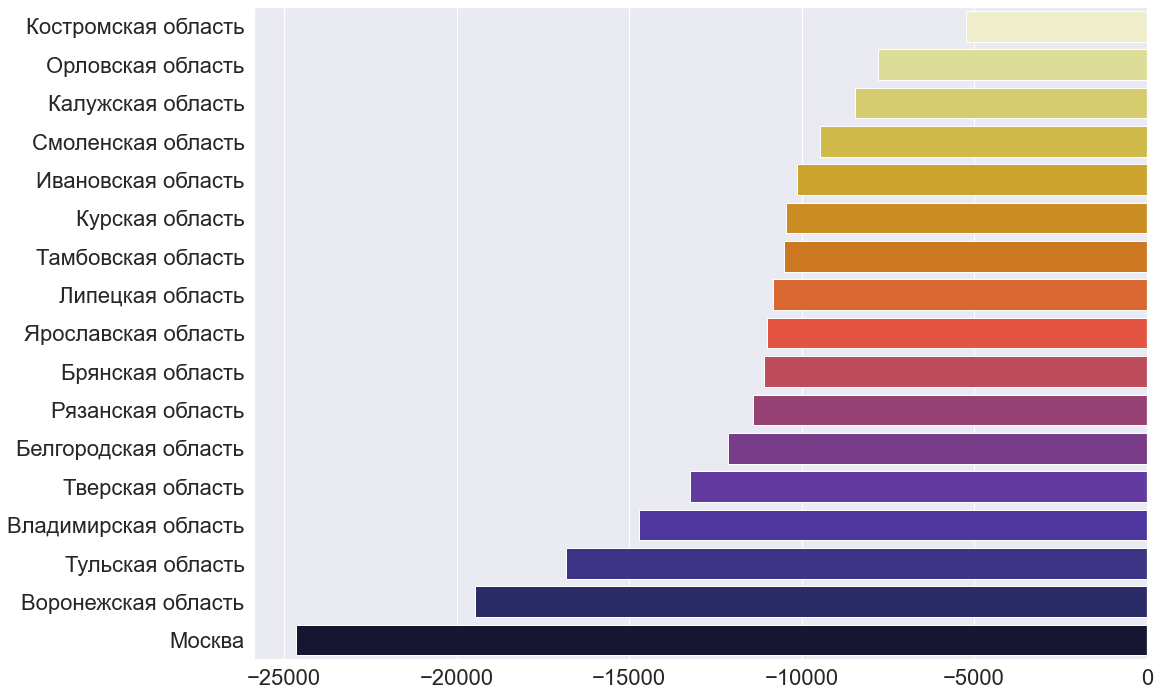

In [396]:
data = list(nat_grow_CFO)
labels = list(nat_grow_CFO.index)


sns.set(font_scale = 2)
plt.figure(figsize=(16, 12))
sns.barplot(x=data, y=labels, palette="CMRmap_r")
plt.savefig('CFO_nat_grow.png', bbox_inches='tight')
plt.show()

In [397]:
#http://www.demoscope.ru/weekly/ssp/census.php?cy=3
nations = pd.DataFrame({'russ':[1151517, 1198009, 1230642, 1280457, 1403977, 1404653],
                        'ukr': [68230, 53767, 63362, 75145, 57846, 41914],
                        'total': [1226328, 1261140, 1308231, 1378287, 1511620, 1532526]})
years = [1959, 1970, 1979, 1989, 2002, 2010]

In [398]:
nations.index = years
nations

,russ,ukr,total
1959,1151517,68230,1226328
1970,1198009,53767,1261140
1979,1230642,63362,1308231
1989,1280457,75145,1378287
2002,1403977,57846,1511620
2010,1404653,41914,1532526


In [399]:
np.array(nations.total)

array([1226328, 1261140, 1308231, 1378287, 1511620, 1532526], dtype=int64)

In [400]:
nations['russ_percent'] = np.array(nations.russ)/np.array(nations.total) * 100
nations['ukr_percent'] = np.array(nations.ukr)/np.array(nations.total) * 100 
nations

,russ,ukr,total,russ_percent,ukr_percent
1959,1151517,68230,1226328,93.899593,5.563764
1970,1198009,53767,1261140,94.994132,4.263365
1979,1230642,63362,1308231,94.069167,4.843334
1989,1280457,75145,1378287,92.902059,5.452058
2002,1403977,57846,1511620,92.878964,3.826755
2010,1404653,41914,1532526,91.656063,2.734962


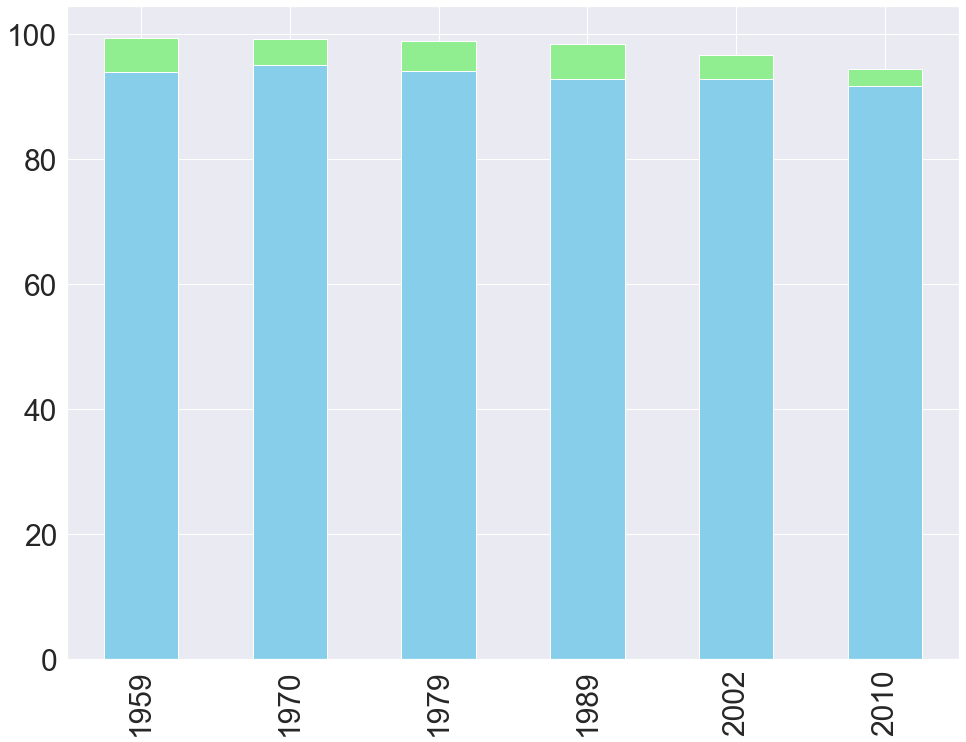

In [401]:
nations.loc[:, ['russ_percent', 'ukr_percent']].plot(kind='bar',
                                                     stacked=True,
                                                     color=['skyblue', 'lightgreen'],
                                                     legend=False,
                                                     figsize=(16,12),
                                                     fontsize = 30)

plt.savefig('nat_distrib.png', bbox_inches='tight')
plt.show()

In [402]:
#https://belg.gks.ru/population

belg_age_dist = pd.read_excel('Bvozgr99_20.xls', index_col=1, header=3)

belg_age_dist.drop(labels='Unnamed: 0',
                   axis='columns',
                   inplace = True)
belg_age_dist.drop(labels=belg_age_dist.iloc[1].name,
                   axis='rows',
                   inplace = True)

belg_age_dist.rename(columns={'20022)': '2002'},
                     inplace=True)
belg_age_dist = belg_age_dist[0:16]
belg_age_dist

,1959,1970,1979,1989,2002,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Все население,1226328.0,1265794.0,1308231.0,1378287.0,1511620.0,1513860.0,1511662.0,1511715.0,1514153.0,1520102.0,...,1532353.0,1536073.0,1540985.0,1544108.0,1547936.0,1550137.0,1552865.0,1549876\n1549876\n1549876,1547418.0,1549151.0
0-4,128794.0,82068.0,87213.0,107077.0,59690.0,62353.0,64830.0,66183.0,68815.0,71666.0,...,79832.0,82424.0,84581.0,85706.0,86946.0,88534.0,88887.0,86029,82375.0,77756.0
5-9,123388.0,114022.0,82354.0,97647.0,71387.0,68720.0,65659.0,64013.0,62944.0,64044.0,...,68526.0,70900.0,73463.0,76311.0,78993.0,81646.0,84228.0,86186,87224.0,88691.0
10-14,79002.0,127899.0,88823.0,91093.0,106744.0,96145.0,89567.0,83939.0,80015.0,75635.0,...,66470.0,64965.0,65712.0,67138.0,69234.0,70001.0,72414.0,74950,77769.0,80658.0
15-19,95839.0,103053.0,110221.0,82802.0,131160.0,130785.0,126397.0,122715.0,116003.0,109117.0,...,88887.0,84094.0,77466.0,73518.0,69262.0,66350.0,64665.0,65461,67350.0,69913.0
20-24,99936.0,64776.0,105256.0,82753.0,107324.0,113220.0,118033.0,120969.0,125842.0,129667.0,...,125466.0,118267.0,111445.0,102962.0,96019.0,88197.0,82348.0,75680,72303.0,69394.0
25-29,96952.0,59246.0,98740.0,113254.0,102837.0,105194.0,106149.0,108157.0,109474.0,112785.0,...,123896.0,128520.0,131770.0,131347.0,129595.0,127468.0,121192.0,114146,105833.0,99559.0
30-34,107904.0,106374.0,59667.0,114142.0,96529.0,98545.0,101153.0,102675.0,104659.0,105466.0,...,111814.0,112863.0,115764.0,119144.0,122482.0,124679.0,129482.0,132136,131843.0,130510.0
35-39,65055.0,83334.0,80082.0,101530.0,106828.0,100469.0,97404.0,96893.0,96501.0,98696.0,...,105344.0,107337.0,107819.0,109819.0,110969.0,113040.0,114209.0,116582,119626.0,123257.0
40-44,67848.0,107793.0,99230.0,59074.0,132492.0,129959.0,124949.0,117667.0,111720.0,105839.0,...,98021.0,97952.0,100025.0,101679.0,104796.0,106438.0,108530.0,108558,110293.0,111559.0


In [403]:
belg_age_dist[2020]

Все население    1549151.0
0-4                77756.0
5-9                88691.0
10-14              80658.0
15-19              69913.0
20-24              69394.0
25-29              99559.0
30-34             130510.0
35-39             123257.0
40-44             111559.0
45-49             104239.0
50-54              96525.0
55-59             120099.0
60-64             116957.0
65-69              95690.0
70 и более        164344.0
Name: 2020, dtype: float64

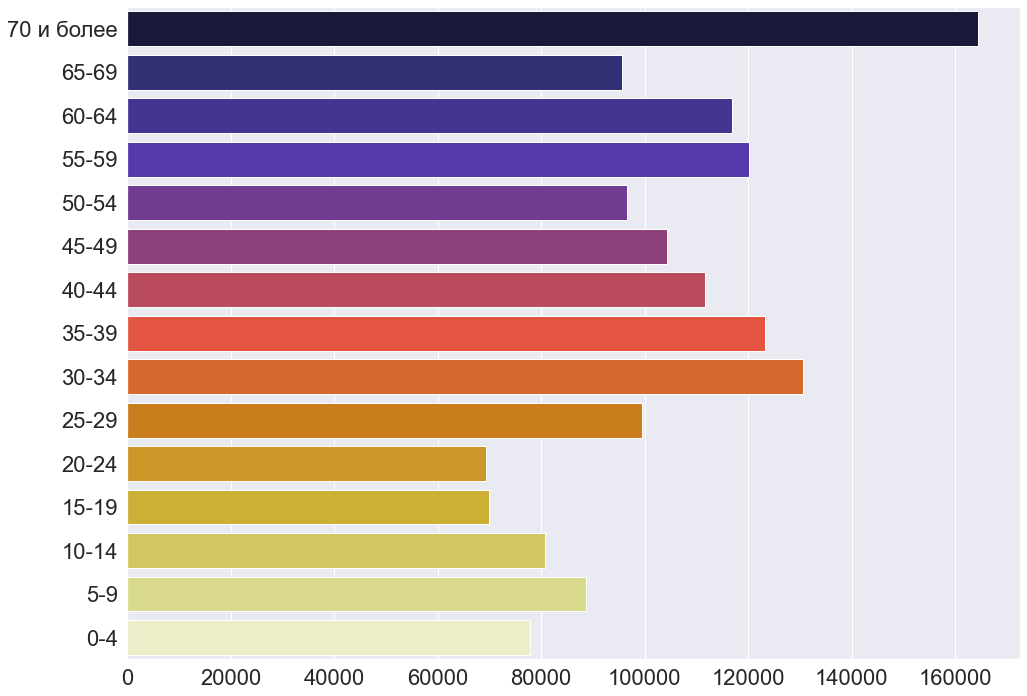

In [404]:


data = list(belg_age_dist[1:][2020][::-1])
labels = list(belg_age_dist[1:][2020][::-1].index)


sns.set(font_scale = 2)
plt.figure(figsize=(16, 12))
sns.barplot(x=data, y=labels, palette="CMRmap")
plt.savefig('age_heap2020.png', bbox_inches='tight')
plt.show()

<ipython-input-405-b60287738f0d>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


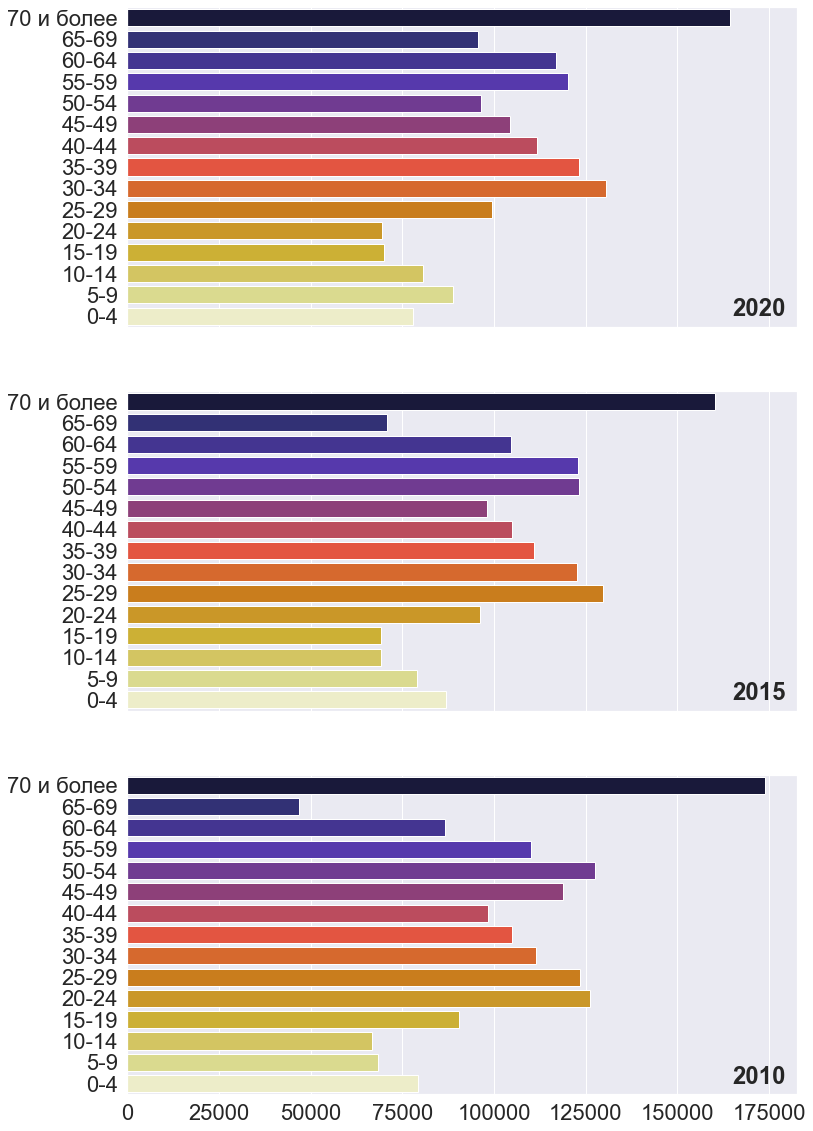

In [405]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20), sharex=True)

data = list(belg_age_dist[1:][2020][::-1])
labels = list(belg_age_dist[1:][2020][::-1].index)

sns.set(font_scale = 2)
sns.barplot(x=data, y=labels, palette="CMRmap", ax=ax1)
ax1.text(165000, 14, '2020', weight = 'semibold')

data = list(belg_age_dist[1:][2015][::-1])
labels = list(belg_age_dist[1:][2015][::-1].index)

sns.barplot(x=data, y=labels, palette="CMRmap", ax=ax2)
ax2.text(165000, 14, '2015', weight = 'semibold')

data = list(belg_age_dist[1:][2010][::-1])
labels = list(belg_age_dist[1:][2010][::-1].index)

sns.barplot(x=data, y=labels, palette="CMRmap", ax=ax3)
ax3.text(165000, 14, '2010', weight = 'semibold')

f.savefig('age_heap10_20.png', bbox_inches='tight')
f.show()